# Chapter 5 - Algorithms for supervised learning 
The following exercises test your familiarity with the content of chapter 5. The corresponding [tutorial notebook](https://github.com/Humboldt-WI/bads/blob/master/tutorials/5_nb_supervised_learning.ipynb) was quite heavy including a walkthrough of building logit and tree models from scratch. Given the algorithm-heavy tutorial, we opted for a somewhat light exercise session that basically allows you to verify some of the claims made in the lecture. Specifically, the exercise revisits the lecture part on linear and logistic regression for classification. After completing the exercises, you will have gained even more confidence in logistic regression being the better approach for classification and, and this is maybe the main point of the tasks, further improved your Python programming skills. 

Have fun with the following tasks.

## Exercise 1: 
We established in the lecture, that the linear regression model is not suitable for classification problems. Let's test this claim empirically.

### 1.1 Synthetic data
Create a synthetic data set for binary classification using the sklearn function `make_classification()`. We want to plot the data later. So use only two input variables.

In [1]:
# Import library
from sklearn.datasets import make_classification

# Generate data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, n_samples=500, random_state=111)


### 1.2 Linear regression
We discussed the analytical solution to the least-squares loss minimization problem in the lecture. To recall, using our standard notation, we can compute the regression parameters $\beta$ by 
$$ \beta^* = \left( X^{\top} X \right)^{-1}  X^{\top}  y $$

Calculate $\beta^*$ using plain numpy. Recall that you need to augment $X$ with a column of ones to ensure that your regression model includes an intercept.  

In [8]:
import numpy as np
X_ =np.c_[np.ones((len(X),1)),X] # add columns of ones
Xt = np.transpose(X_) # transpose
XtX = np.dot(Xt,X_) # computer XtX
Xty = np.dot(Xt,y) # compute Xty
# Option 1 (implement the above equation)
beta = np.dot(np.linalg.inv(XtX), Xty) 
# Option 2 (solving a linear system aX=b)
beta_2 = np.linalg.solve(XtX,Xty) # calculate ß
# Both give the same result (minus some tiny differences due to rounding)
print(beta - beta_2)
print(beta) # intercept, ß1, ß2

[0.00000000e+00 3.46944695e-18 0.00000000e+00]


### 1.3 Plotting
Create a chart that depicts your data set. Use different colors for the data points of the two classes. Also plot the decision surface that corresponds to your regression model from task 1.2.

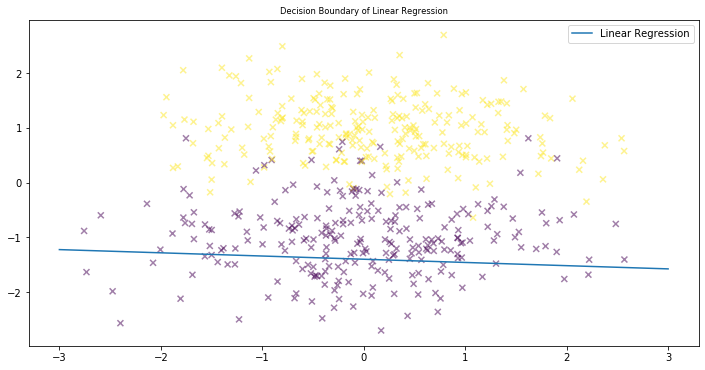

In [59]:
from matplotlib import pyplot as plt

# Set parameters for plotting
%matplotlib inline  
plt.rcParams["figure.figsize"] = (12,6)


# Decision boundary
x_1 = np.linspace(-3, 3)  # define hyperplane range, this might differ depending on the random state you chose for the random data generation
x_2 = - beta[1] / beta[2] * x_1 - beta[0] / beta[2] # compute decision boundary based on ß

# Plotting
plt.title("Decision Boundary of Linear Regression", fontsize='small')
plt.scatter(X[:,0], X[:,1], c=y, alpha=.5, marker='x') # plot observations using a different color for each class
plt.plot(x_1,x_2, label='Linear Regression') # plot decision boundary
plt.legend();

### 1.4 Residuals
Compute and plot the residuals of your linear regression model. Inspecting the graph, how do you judge the adequacy of the linear regression model for the data at hand.

Do both ways to calculate the residuals give the same result? True


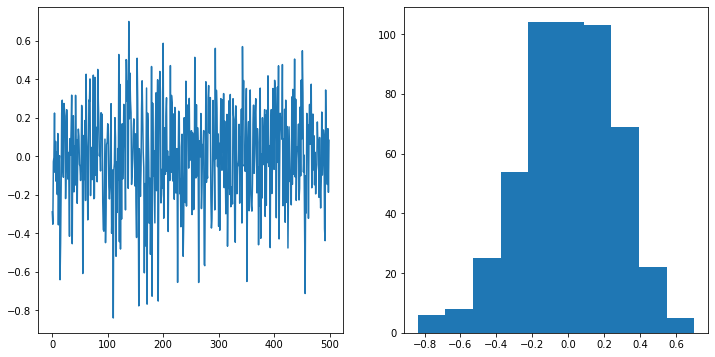

In [62]:
# For illustration, we first demonstrate how to compute the resdiduals in a loop. 
# This approach is maybe more intuitive (but computationally inefficient)

# Create empty list to save residuals
residuals = []

# Loop through each observation to calculate the residuals
for i in np.arange(X.shape[0]):
  pred = beta[0] + beta[1]*X[i, 0] + beta[2]*X[i,1] # make the prediction using the calculated ß-values and the observation as inputs
  res = y[i] - pred # calculate residual by subtracting prediction value from the true value
  residuals.append(res)


# A better (because more efficient) approach to calculate the residuals is to use matrix multiplication
y_hat = np.dot(X_, beta)
residuals_2 = y - y_hat
print("Do both ways to calculate the residuals give the same result? {}".format(not any(residuals-residuals_2)))

# Plot the residuals
plt.subplot(1,2,1)
plt.plot(residuals);
plt.subplot(1,2,2)
plt.hist(residuals);

**Answer:** The first plot in 1.3 already showed that the linear regression model is not adequate for the task at hand. Considering the two above plots, the magnitude of residuals may be taken as evidence that the model does not give a good fit. Further, we can easily verify that the magnitude of predictions exceeds the zero-one rage, which inevitably causes unnecessarily large residuals. 

In [74]:
print("The maximum and minimum predicted value are {:.4} and {:.4}, respectively.".format(np.max(y_hat), np.min(y_hat)))

The maximum and minimum predicted value are 1.509 and -0.4766, respectively


### 1.5 Logistic regression
Now estimate a logistic regression model for your synthetic data set using standard sklearn functionality. Reproduce the plot from task 1.3 and incorporate the class boundary from the logistic model in the plot. It should also include the result from the linear regression. By visual inspection, does the logit model give a better fit? Briefly state your opinion. 

In [75]:
# Import library 
from sklearn.linear_model import LogisticRegression

# Fit logistic regression model
log = LogisticRegression()
log.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

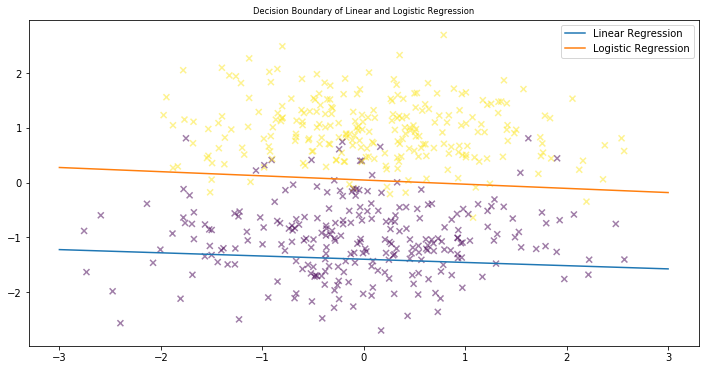

In [76]:
# Generate decision boundary for logistic regression
# x_1 stays the same for this example, however might need adjusting depending on the decision boundary if you chose a different random state
x_2_ = -log.coef_[0][0] / log.coef_[0][1] * x_1 - log.intercept_ /log.coef_[0][1] 

# Plot the results
plt.title("Decision Boundary of Linear and Logistic Regression", fontsize='small')
plt.scatter(X[:,0], X[:,1], c=y, alpha=.5, marker='x')
plt.plot(x_1,x_2, label='Linear Regression')
plt.plot(x_1,x_2_, label='Logistic Regression')
plt.legend();

**Answer:** The decision boundary of the logistic regression better approximates the task at hand. The slopes of both boundaries seem alike, however the logistic regression better divides the yellow and purple observations into two groups (higher purity).